### Importing Libraries
---------------------------


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#Loading data
df = pd.read_pickle('World Cup Results.pkl')
df.head()
#df.shape

,Year,Winner,Runners-Up,Third,Fourth
0,1930,Uruguay,Argentina,USA,Yugoslavia
1,1934,Italy,Czechoslovakia,Germany,Austria
2,1938,Italy,Hungary,Brazil,Sweden
3,1950,Uruguay,Brazil,Sweden,Spain
4,1954,Germany,Hungary,Austria,Uruguay


## Which Countries are the most consistent at the highest levels?

We will judge this by awarding each team points based on their finishing position in each world cup. 
A winner gets 5 points, runners-up gets 3 points, third gets 2 points, and fourth gets 1 point.

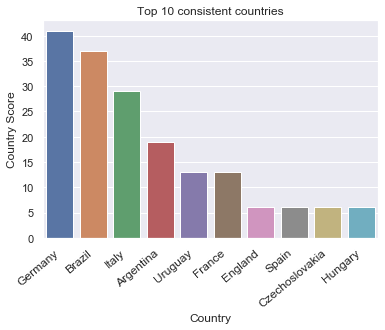

In [51]:
score_dict = {}
for winner in df['Winner'].iteritems():
    if (winner[1] in score_dict):
        score_dict[winner[1]] += 5
    else:
        score_dict[winner[1]] = 5
        
for r_up in df['Runners-Up'].iteritems():
    if (r_up[1] in score_dict):
        score_dict[r_up[1]] += 3
    else:
        score_dict[r_up[1]] = 3
        
for third in df['Third'].iteritems():
    if (third[1] in score_dict):
        score_dict[third[1]] += 2
    else:
        score_dict[third[1]] = 2
    
for fourth in df['Fourth'].iteritems():
    if (fourth[1] in score_dict):
        score_dict[fourth[1]] += 1
    else:
        score_dict[fourth[1]] = 1
    
country_li = []
score_li = []

for (k,v) in score_dict.items():
    country_li.append(k)
    score_li.append(v)
    
cons_df = pd.DataFrame({
    'Country' : country_li,
    'Score': score_li
})
cons_df = cons_df.head(10).sort_values(by="Score",ascending=False)

cont_plt = sns.barplot(x="Country", y="Score", data = cons_df)
cont_plt.set_title("Top 10 consistent countries")
cont_plt.set_xlabel("Country")
cont_plt.set_ylabel("Country Score")
_ = cont_plt.set_xticklabels(cont_plt.get_xticklabels(), fontsize=12,rotation=40, ha="right")